In [1]:
# Perform the below command in Anaconda Prompt
# 1. nltk ---> conda install nltk / pip3 install nltk / pip install nltk
# 2. Download the corpus for stopwords nltk.download_shell()--- Search for stopwords

In [2]:
import nltk
from nltk.corpus import stopwords

In [3]:
import pandas as pd

In [4]:
#Load the SMS dataset
messages = pd.read_csv('smsspamcollection/SMSSpamCollection' , sep='\t' , names=["label","message"])

In [5]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#Download stopwords
nltk.download('stopwords')

In [6]:
#EDA

In [7]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
messages.groupby('label').describe()

message
label                                                          
ham   count                                                4825
      unique                                               4516
      top                                Sorry, I'll call later
      freq                                                   30
spam  count                                                 747
      unique                                                653
      top     Please call our customer service representativ...
      freq                                                    4

In [9]:
#Lets create a new column to detect how long the text message
messages['length'] = messages['message'].apply(len)

In [10]:
messages.head(5)

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

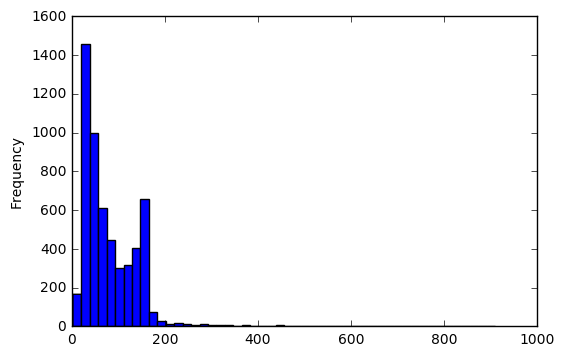

In [12]:
messages['length'].plot(bins=50, kind='hist')

In [13]:
messages.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [14]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B3E8BE0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000B4630B8>], dtype=object)

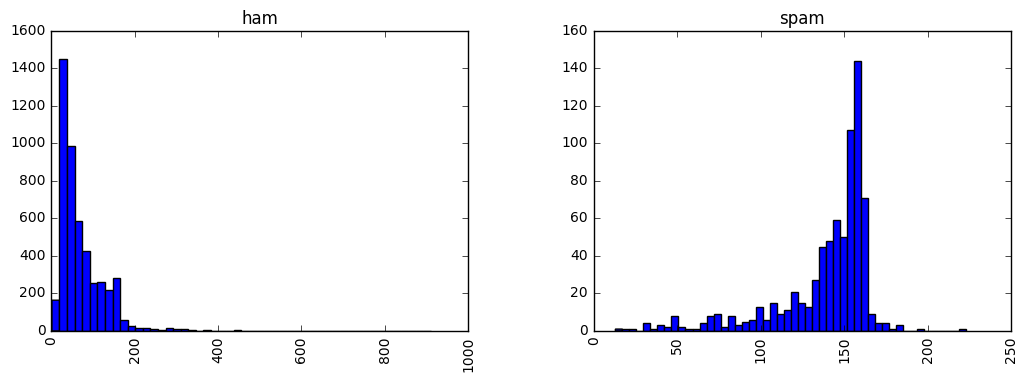

In [15]:
messages.hist(column='length', by='label' , bins=50, figsize=(12,4))

## Text Pre-processing ---- Tokenization

In [28]:
"""
Basic Expectation of any Machine Learning or AI model is your data must not have any punctuations 
and any stopwords !!!

One of the best way to deal with punctuation is to use the default string library provided by python

"""

import string

message_sample = 'Sample message! Notice: it has punctuation.'
message_sample2 = 'I am using What\'s App'
#Check character to see if they have the punctuation

output = [char for char in message_sample if char not in string.punctuation]
output2 = [char for char in message_sample2 if char not in string.punctuation]
output = ''.join(output)
output2 = ''.join(output2)
output2


'I am using Whats App'

In [17]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
#Dealing with removing stopwords
from nltk.corpus import stopwords
stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [20]:
output.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [30]:
clean_data = [word for word in output.split() if word.lower() not in stopwords.words('english')]
clean_data2 = [word for word in output2.split() if word.lower() not in stopwords.words('english')]
clean_data2

['using', 'Whats', 'App']

In [25]:
#Write a function to perform removal of punctuation and stopwords and apply that function in
#your sms dataset
import string
from nltk.corpus import stopwords
def text_process(message):
    #Check character to see if they have the punctuation
    output = [char for char in message if char not in string.punctuation]
    output = ''.join(output)
    return [word for word in output.split() if word.lower() not in stopwords.words('english')]

In [26]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
messages['message'].head(10).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
5    [FreeMsg, Hey, darling, 3, weeks, word, back, ...
6    [Even, brother, like, speak, treat, like, aids...
7    [per, request, Melle, Melle, Oru, Minnaminungi...
8    [WINNER, valued, network, customer, selected, ...
9    [mobile, 11, months, U, R, entitled, Update, l...
Name: message, dtype: object

In [31]:
#NLP has two options to deal with Feature data
#1. By doing Normalization of the data (Stemming, POS, Lemmatization !!)
#2. Vectorization
#  Three steps to create bag-of-words model:
#  1. Count how many times does a word occur in each message (Term Frequency)
#  2. Weight the counts, so that frequent tokens gets the lower weight (inverse Document Freq)
#  3. NOrmalize vectors (L2 normalization)
# Sklearn provides CountVectorizer class to perform the above 3 steps !!!

from sklearn.feature_extraction.text import CountVectorizer

In [32]:
bow_object = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [34]:
len(bow_object.vocabulary_)

11425

In [39]:
#Example of a single message 
msg = messages['message'][3]
print(msg)
msgobject = bow_object.transform([msg])
print(msgobject)
print(msgobject.shape)

U dun say so early hor... U c already then say...
  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2
(1, 11425)


In [41]:
print(bow_object.get_feature_names()[9554])

say


In [42]:
#Applying CountVectorizer object over the entire dataset(message field)
messages_bow = bow_object.transform(messages['message'])

In [43]:
messages_bow.shape

(5572, 11425)

In [44]:
#Applying TF-IDF
#TF - Term Frequency : It measure how frequently a term(words) occurs in a document
# TF(term) = (Number of times term appears in a document)/(Total number of terms in the documnt)
#IDF- Inverse Document Frequency: It measure how important the term is? It defines the weight
# of the term where if weight is less, the frq is huge

#IDF(term) = log_base10(Total no of documents) / No of docs with term t in it

#Document = 100 words ------> dog: 3
#TF(dog) = 3/100  ---> 0.03

#we have 10 million docs and the word dog appeans on one thousand docs.

#IDF = log(10000000 / 1000) = 4

#TF-IDF(dog) = 0.03*4 = 0.12 






from sklearn.feature_extraction.text import TfidfTransformer
tfidf_object = TfidfTransformer().fit(messages_bow)
tfidf_msgObject = tfidf_object.transform(msgobject)
print(tfidf_msgObject)

  (0, 9554)	0.538562626293
  (0, 7186)	0.438936565338
  (0, 6222)	0.318721689295
  (0, 6204)	0.299537997237
  (0, 5261)	0.297299574059
  (0, 4629)	0.266198019061
  (0, 4068)	0.408325899334


In [45]:
messages_tfidf = tfidf_object.transform(messages_bow)
print(messages_tfidf)

  (0, 11163)	0.230266855924
  (0, 10965)	0.190734285451
  (0, 8917)	0.247046523768
  (0, 8336)	0.170468692922
  (0, 7668)	0.264033840655
  (0, 7555)	0.312538562607
  (0, 6937)	0.183469241361
  (0, 6906)	0.151584746647
  (0, 6217)	0.189155577328
  (0, 5769)	0.24984711893
  (0, 5218)	0.268705938625
  (0, 5217)	0.298351840882
  (0, 4653)	0.312538562607
  (0, 2060)	0.242039602564
  (0, 1483)	0.312538562607
  (0, 1110)	0.288286201631
  (1, 11072)	0.400615609824
  (1, 10698)	0.206363748132
  (1, 8590)	0.504340590131
  (1, 7701)	0.376740107081
  (1, 3064)	0.291199541124
  (1, 2451)	0.561988811929
  (2, 11123)	0.191043872205
  (2, 11084)	0.158981453472
  (2, 10686)	0.139955408208
  :	:
  (5568, 6882)	0.313674697762
  (5568, 6691)	0.477810764018
  (5568, 6354)	0.557572104865
  (5568, 4880)	0.385312208609
  (5569, 10199)	0.520467167164
  (5569, 8252)	0.432829970906
  (5569, 3721)	0.520467167164
  (5569, 3228)	0.520467167164
  (5570, 11006)	0.204345259945
  (5570, 10787)	0.228678434865
  (5570, 9

In [46]:
#Create our model --- NaiveBayes Classification Algo(Binary and Multinomial Classification)
#GaussianNB, BernoulliNB-->BinomialNB, MultinomialNB, 
#MultinomialNB support working with engineered text data
from sklearn.naive_bayes import MultinomialNB
spam_detection = MultinomialNB().fit(messages_tfidf,messages['label'])

In [47]:
spam_detection.score(messages_tfidf,messages['label'])

0.97936109117013637

In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(messages['label'],spam_detection.predict(messages_tfidf))
cm

array([[4825,    0],
       [ 115,  632]])

In [49]:
#End of Demo 1

In [50]:
#Demo: 2 --- Spam Detection using Pipeline

In [51]:
#Create train-test-split
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(messages['message'],
                                               messages['label'],
                                               test_size=0.2,
                                               random_state=0)


In [52]:
#ML Data Pipeline
from sklearn.pipeline import Pipeline
pipeline_obj = Pipeline([
        
        ('bow',CountVectorizer(analyzer=text_process)), #Strings to tokens with integer count
        ('tfidf', TfidfTransformer()), #integer counts to weighted tf-idf scores
        ('classifier',MultinomialNB()), #train on TF-IDF vectors with NB classifier
        
    ])

In [53]:
pipeline_obj.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x000000000B46DB70>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [54]:
pipeline_obj.score(X_train,y_train)

0.97711465111061246

In [55]:
pipeline_obj.score(X_test,y_test)

0.96591928251121073